# Digital Skola Mini Project: E-Commerce Sales Analysis

## Importing Important Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel('dataset-ecommerce.xlsx')

In [3]:
dataset

,Order Id,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-172,2022-01-01,2022-01-09,8.0,First Class,Auto & Accessories,Car Media Players,140,4,0.02,...,4.9,Critical,HY-00172,Mathis Mccarthy,Consumer,Zapopan,Jalisco,Mexico,North,Jan
1,AU-2015-1473,2022-01-01,2022-01-08,7.0,First Class,Auto & Accessories,Bike Tyres,72,5,0.02,...,1.4,Medium,NI-001473,Blanchard Vittorini,Consumer,Seoul,Seoul,South Korea,North Asia,Jan
2,AU-2015-1650,2022-01-01,2022-01-11,10.0,First Class,Auto & Accessories,Car Body Covers,117,5,0.02,...,2.5,High,UM-001650,Hood Mitchum,Home Office,Roodepoort,Gauteng,South Africa,Africa,Jan
3,AU-2015-1999,2022-01-01,2022-01-09,8.0,First Class,Auto & Accessories,Car Media Players,140,4,0.02,...,4.9,High,CK-001999,Nicholson Murdock,Consumer,Istanbul,Istanbul,Turkey,EMEA,Jan
4,AU-2015-2155,2022-01-01,2022-01-11,10.0,First Class,Auto & Accessories,Car & Bike Care,118,3,0.02,...,3.1,High,LD-002155,Medina Fjeld,Home Office,Santa Catarina,Nuevo León,Mexico,North,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,FA-2015-30775,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51291,FA-2015-30775,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51292,FA-2015-30775,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51293,FA-2015-30775,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


## Data Preparation and Data Cleaning

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51295 entries, 0 to 51294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Id          51295 non-null  object        
 1   Order Date        51295 non-null  datetime64[ns]
 2   Ship Date         51295 non-null  datetime64[ns]
 3   Aging             51295 non-null  float64       
 4   Ship Mode         51295 non-null  object        
 5   Product Category  51295 non-null  object        
 6   Product           51295 non-null  object        
 7   Sales             51295 non-null  int64         
 8   Quantity          51295 non-null  int64         
 9   Discount          51295 non-null  float64       
 10  Profit            51295 non-null  float64       
 11  Shipping Cost     51295 non-null  float64       
 12  Order Priority    51295 non-null  object        
 13  Customer ID       51294 non-null  object        
 14  Customer Name     5129

In [5]:
dataset.describe()

,Order Date,Ship Date,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
count,51295,51295,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000
mean,2022-07-02 09:53:47.893556736,2022-07-07 14:41:49.577931520,5.255122,156.409553,2.997368,0.029973,72.708831,7.271440
min,2022-01-01 00:00:00,2022-01-01 00:00:00,1.000000,33.000000,1.000000,0.010000,0.500000,0.100000
25%,2022-04-02 00:00:00,2022-04-07 00:00:00,3.000000,109.000000,2.000000,0.020000,25.700000,2.600000
50%,2022-07-03 00:00:00,2022-07-08 00:00:00,5.000000,159.000000,3.000000,0.030000,67.000000,6.700000
75%,2022-10-02 00:00:00,2022-10-07 00:00:00,8.000000,218.000000,4.000000,0.040000,120.600000,12.100000
max,2023-01-02 00:00:00,2023-01-10 00:00:00,10.500000,250.000000,5.000000,0.050000,167.500000,16.800000
std,NaN,NaN,2.959701,65.780185,1.413253,0.014112,49.095508,4.908355


### Data Cleaning

In [7]:
df = dataset.copy()

Region

In [8]:
df['Region'].unique()

array(['North', 'North Asia', 'Africa', 'EMEA', 'Central',
       'Southeast Asia', 'South', 'Canada', 'East', 'Oceania',
       'Central Asia', 'West', 'Caribbean', nan, '4orth'], dtype=object)

In [9]:
df['Region'] = df['Region'].replace('North', 'North Asia')
df['Region'] = df['Region'].replace('4orth', 'North Asia')
df['Region'] = df['Region'].replace('South', 'South Asia')
df['Region'] = df['Region'].replace('East', 'East Asia')
df['Region'] = df['Region'].replace('West', 'West Asia')
df['Region'] = df['Region'].replace('Central', 'Central Asia')

In [10]:
df['Region'].unique()

array(['North Asia', 'Africa', 'EMEA', 'Central Asia', 'Southeast Asia',
       'South Asia', 'Canada', 'East Asia', 'Oceania', 'West Asia',
       'Caribbean', nan], dtype=object)

In [11]:
#Mengganti NaN dengan Other
df['Region'].fillna('Others', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12604\2595550514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Region'].fillna('Others', inplace=True)


In [12]:
df['Region'].unique()

array(['North Asia', 'Africa', 'EMEA', 'Central Asia', 'Southeast Asia',
       'South Asia', 'Canada', 'East Asia', 'Oceania', 'West Asia',
       'Caribbean', 'Others'], dtype=object)

In [13]:
df['Region'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
51290    False
51291    False
51292    False
51293    False
51294    False
Name: Region, Length: 51295, dtype: bool

In [14]:
df

,Order Id,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-172,2022-01-01,2022-01-09,8.0,First Class,Auto & Accessories,Car Media Players,140,4,0.02,...,4.9,Critical,HY-00172,Mathis Mccarthy,Consumer,Zapopan,Jalisco,Mexico,North Asia,Jan
1,AU-2015-1473,2022-01-01,2022-01-08,7.0,First Class,Auto & Accessories,Bike Tyres,72,5,0.02,...,1.4,Medium,NI-001473,Blanchard Vittorini,Consumer,Seoul,Seoul,South Korea,North Asia,Jan
2,AU-2015-1650,2022-01-01,2022-01-11,10.0,First Class,Auto & Accessories,Car Body Covers,117,5,0.02,...,2.5,High,UM-001650,Hood Mitchum,Home Office,Roodepoort,Gauteng,South Africa,Africa,Jan
3,AU-2015-1999,2022-01-01,2022-01-09,8.0,First Class,Auto & Accessories,Car Media Players,140,4,0.02,...,4.9,High,CK-001999,Nicholson Murdock,Consumer,Istanbul,Istanbul,Turkey,EMEA,Jan
4,AU-2015-2155,2022-01-01,2022-01-11,10.0,First Class,Auto & Accessories,Car & Bike Care,118,3,0.02,...,3.1,High,LD-002155,Medina Fjeld,Home Office,Santa Catarina,Nuevo León,Mexico,North Asia,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,FA-2015-30775,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South Asia,Jan
51291,FA-2015-30775,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South Asia,Jan
51292,FA-2015-30775,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South Asia,Jan
51293,FA-2015-30775,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,...,2.8,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South Asia,Jan


Product

In [15]:
df['Product'].unique()

array(['Car Media Players', 'Bike Tyres', 'Car Body Covers',
       'Car & Bike Care', 'Tyre', 'Car Speakers',
       'Car Pillow & Neck Rest', 'Car Mat', 'Apple Laptop', 'Mouse',
       'Watch', 'Tablet', 'LED', 'Iron', 'Samsung Mobile', 'Mixer/Juicer',
       'Dinner Crockery', 'Sofa Covers', 'Shoe Rack', 'Beds',
       'Bed Sheets', 'Dinning Tables', 'Umbrellas', 'Sofas', 'Towels',
       'T - Shirts', 'Casula Shoes', 'Fossil Watch', 'Titak watch',
       'Jeans', 'Sports Wear', 'Shirts', 'Suits', 'Running Shoes',
       'Sneakers', 'Formal Shoes', 'Car Seat Covers', 'Keyboard',
       'Speakers', 'Fans', 'Curtains', 'LCD'], dtype=object)

Product Category

In [16]:
df['Product Category'].unique()

array(['Auto & Accessories', 'Electronic', 'Home & Furniture', 'Fashion'],
      dtype=object)

Extract Month and Year

In [17]:
# Extract year from date
df['year'] = df['Order Date'].dt.year

# Extract month_year from date
df['month'] = df['Order Date'].dt.month

# Extract year and month from date
df['year_month'] = df['Order Date'].dt.to_period('M')

In [18]:
df.head(5)



,Order Id,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Customer Name,Segment,City,State,Country,Region,Months,year,month,year_month
0,AU-2015-172,2022-01-01,2022-01-09,8.0,First Class,Auto & Accessories,Car Media Players,140,4,0.02,...,Mathis Mccarthy,Consumer,Zapopan,Jalisco,Mexico,North Asia,Jan,2022,1,2022-01
1,AU-2015-1473,2022-01-01,2022-01-08,7.0,First Class,Auto & Accessories,Bike Tyres,72,5,0.02,...,Blanchard Vittorini,Consumer,Seoul,Seoul,South Korea,North Asia,Jan,2022,1,2022-01
2,AU-2015-1650,2022-01-01,2022-01-11,10.0,First Class,Auto & Accessories,Car Body Covers,117,5,0.02,...,Hood Mitchum,Home Office,Roodepoort,Gauteng,South Africa,Africa,Jan,2022,1,2022-01
3,AU-2015-1999,2022-01-01,2022-01-09,8.0,First Class,Auto & Accessories,Car Media Players,140,4,0.02,...,Nicholson Murdock,Consumer,Istanbul,Istanbul,Turkey,EMEA,Jan,2022,1,2022-01
4,AU-2015-2155,2022-01-01,2022-01-11,10.0,First Class,Auto & Accessories,Car & Bike Care,118,3,0.02,...,Medina Fjeld,Home Office,Santa Catarina,Nuevo León,Mexico,North Asia,Jan,2022,1,2022-01


In [19]:
# Checking Duplicates
duplicates = df[df.duplicated()]
print("Duplikat berdasarkan semua kolom:\n", duplicates)

Duplikat berdasarkan semua kolom:
             Order Id Order Date  Ship Date  Aging       Ship Mode  \
51287  FA-2015-30775 2023-01-02 2023-01-06    5.0  Standard Class   
51288  FA-2015-30775 2023-01-02 2023-01-06    5.0  Standard Class   
51289  FA-2015-30775 2023-01-02 2023-01-06    5.0  Standard Class   
51290  FA-2015-30775 2023-01-02 2023-01-06    5.0  Standard Class   
51291  FA-2015-30775 2023-01-02 2023-01-06    5.0  Standard Class   
51292  FA-2015-30775 2023-01-02 2023-01-06    5.0  Standard Class   
51293  FA-2015-30775 2023-01-02 2023-01-06    5.0  Standard Class   
51294  FA-2015-30775 2023-01-02 2023-01-06    5.0  Standard Class   

      Product Category      Product  Sales  Quantity  Discount  ...  \
51287          Fashion  Sports Wear     85         3      0.03  ...   
51288          Fashion  Sports Wear     85         3      0.03  ...   
51289          Fashion  Sports Wear     85         3      0.03  ...   
51290          Fashion  Sports Wear     85         3      0

In [20]:
df = df.drop_duplicates()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51287 entries, 0 to 51286
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Id          51287 non-null  object        
 1   Order Date        51287 non-null  datetime64[ns]
 2   Ship Date         51287 non-null  datetime64[ns]
 3   Aging             51287 non-null  float64       
 4   Ship Mode         51287 non-null  object        
 5   Product Category  51287 non-null  object        
 6   Product           51287 non-null  object        
 7   Sales             51287 non-null  int64         
 8   Quantity          51287 non-null  int64         
 9   Discount          51287 non-null  float64       
 10  Profit            51287 non-null  float64       
 11  Shipping Cost     51287 non-null  float64       
 12  Order Priority    51287 non-null  object        
 13  Customer ID       51286 non-null  object        
 14  Customer Name     51287 non

Drop Column 'Order Id' and 'Months'

In [22]:
df.drop(columns=['Order Id', 'Months'], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12604\2071786490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Order Id', 'Months'], inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51287 entries, 0 to 51286
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order Date        51287 non-null  datetime64[ns]
 1   Ship Date         51287 non-null  datetime64[ns]
 2   Aging             51287 non-null  float64       
 3   Ship Mode         51287 non-null  object        
 4   Product Category  51287 non-null  object        
 5   Product           51287 non-null  object        
 6   Sales             51287 non-null  int64         
 7   Quantity          51287 non-null  int64         
 8   Discount          51287 non-null  float64       
 9   Profit            51287 non-null  float64       
 10  Shipping Cost     51287 non-null  float64       
 11  Order Priority    51287 non-null  object        
 12  Customer ID       51286 non-null  object        
 13  Customer Name     51287 non-null  object        
 14  Segment           51287 non

In [25]:
df_cleaned = df.copy()
df_cleaned.to_csv('cleaned_data.csv', index=False)

## EDA

### Distribution

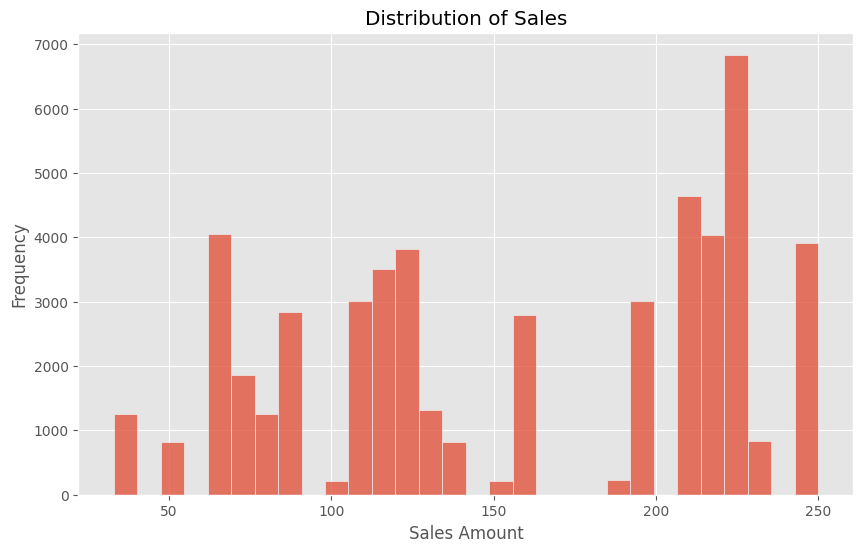

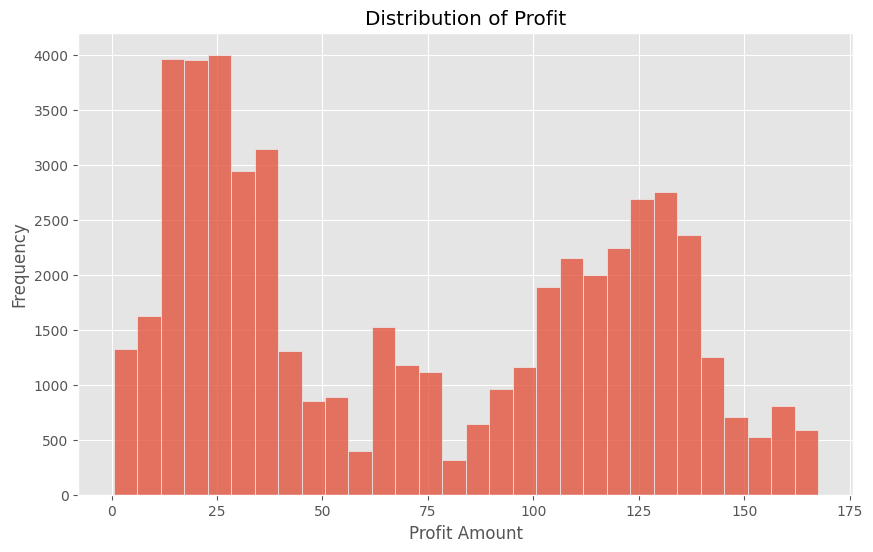

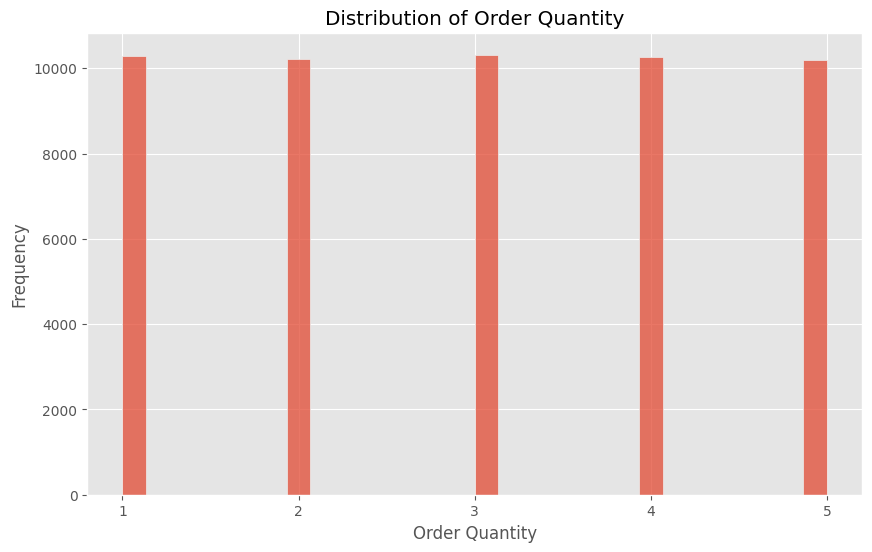

In [66]:

# Plot settings
plt.style.use('ggplot')

# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Sales'], kde=False, bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of Profit
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Profit'], kde=False, bins=30)
plt.title('Distribution of Profit')
plt.xlabel('Profit Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of Order Quantity
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Quantity'], kde=False, bins=30)
plt.title('Distribution of Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.xticks(range(int(dataset['Quantity'].min()), int(dataset['Quantity'].max()) + 1))
plt.show()

### Time Series Analysis

Sales per Month

In [26]:
df_cleaned

,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,Profit,...,Customer ID,Customer Name,Segment,City,State,Country,Region,year,month,year_month
0,2022-01-01,2022-01-09,8.0,First Class,Auto & Accessories,Car Media Players,140,4,0.02,48.8,...,HY-00172,Mathis Mccarthy,Consumer,Zapopan,Jalisco,Mexico,North Asia,2022,1,2022-01
1,2022-01-01,2022-01-08,7.0,First Class,Auto & Accessories,Bike Tyres,72,5,0.02,14.4,...,NI-001473,Blanchard Vittorini,Consumer,Seoul,Seoul,South Korea,North Asia,2022,1,2022-01
2,2022-01-01,2022-01-11,10.0,First Class,Auto & Accessories,Car Body Covers,117,5,0.02,25.3,...,UM-001650,Hood Mitchum,Home Office,Roodepoort,Gauteng,South Africa,Africa,2022,1,2022-01
3,2022-01-01,2022-01-09,8.0,First Class,Auto & Accessories,Car Media Players,140,4,0.02,48.8,...,CK-001999,Nicholson Murdock,Consumer,Istanbul,Istanbul,Turkey,EMEA,2022,1,2022-01
4,2022-01-01,2022-01-11,10.0,First Class,Auto & Accessories,Car & Bike Care,118,3,0.02,30.9,...,LD-002155,Medina Fjeld,Home Office,Santa Catarina,Nuevo León,Mexico,North Asia,2022,1,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51282,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,28.3,...,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South Asia,2023,1,2023-01
51283,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,28.3,...,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South Asia,2023,1,2023-01
51284,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,28.3,...,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South Asia,2023,1,2023-01
51285,2023-01-02,2023-01-06,5.0,Standard Class,Fashion,Sports Wear,85,3,0.03,28.3,...,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South Asia,2023,1,2023-01


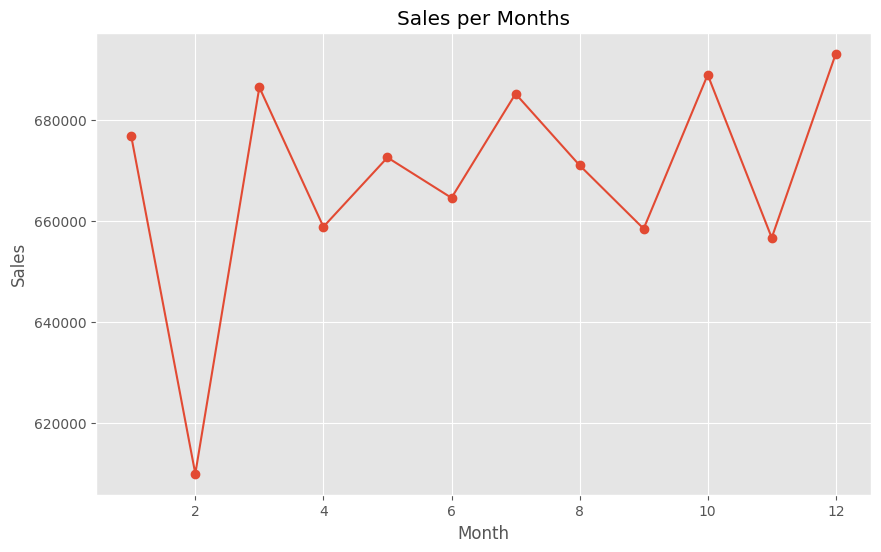

In [27]:
# Group by year and sum the sales
yearly_sales = df_cleaned.groupby('month')['Sales'].sum().reset_index()

# Plot yearly sales
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['month'], yearly_sales['Sales'], marker='o')
plt.title('Sales per Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

Sales per Category by Month

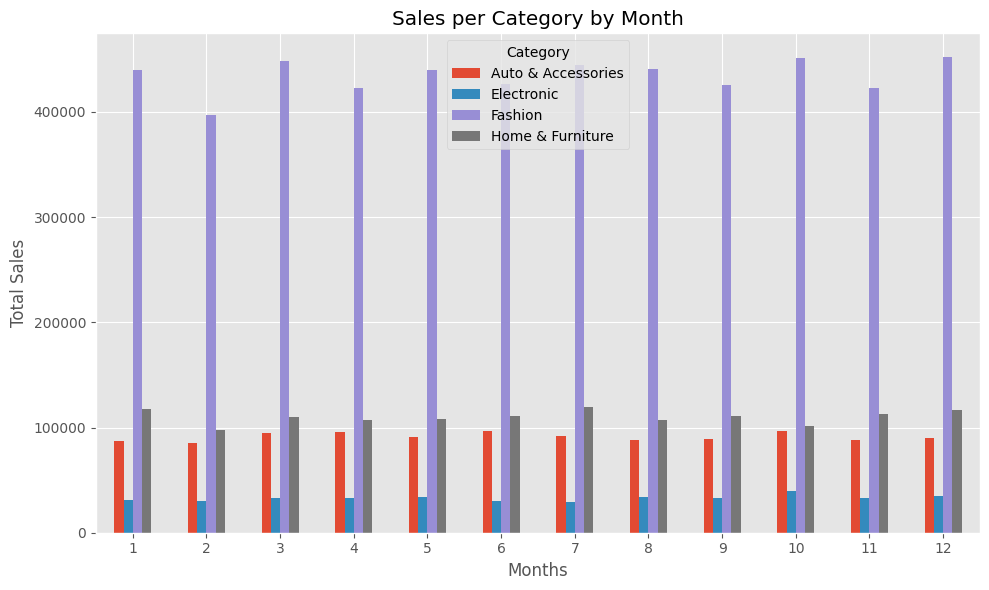

In [28]:
# Mengelompokkan data berdasarkan 'Category' dan 'Months' dan menghitung total penjualan
sales_per_category = df_cleaned.groupby(['month', 'Product Category'])['Sales'].sum().unstack()

# Membuat plot
plt.figure(figsize=(10, 6))
sales_per_category.plot(kind='bar', ax=plt.gca())

plt.title('Sales per Category by Month')
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Sales per Category

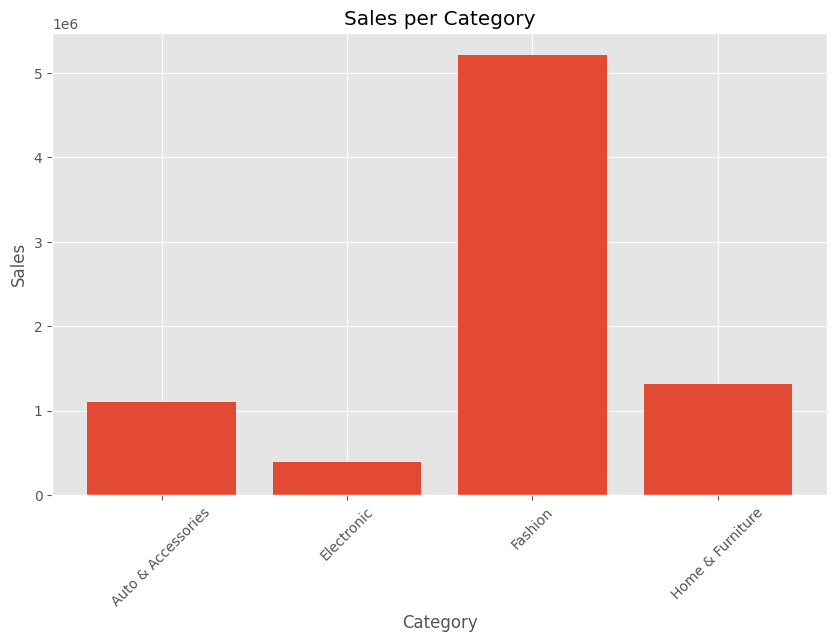

In [29]:
# Group by category and sum the sales
category_sales = df_cleaned.groupby('Product Category')['Sales'].sum().reset_index()

# Plot sales per category
plt.figure(figsize=(10, 6))
plt.bar(category_sales['Product Category'], category_sales['Sales'])
plt.title('Sales per Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Top 10 Product by Sales

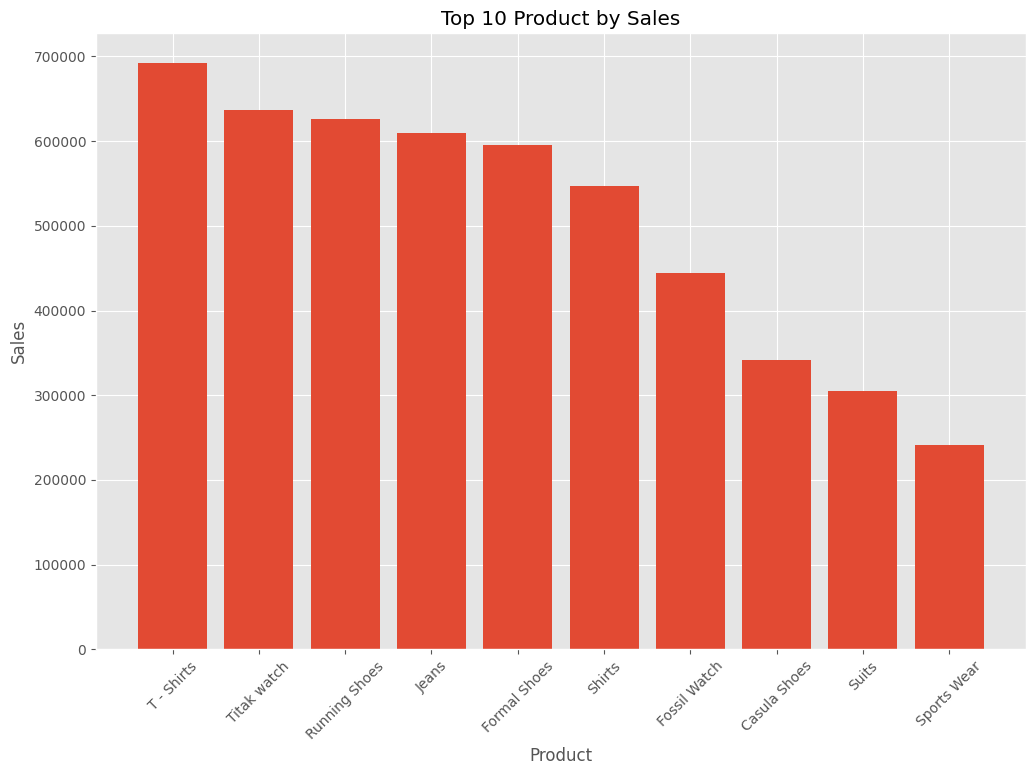

In [30]:
# Group by category and sum the sales
product_sales = df_cleaned.groupby('Product')['Sales'].sum().reset_index()

# Sort categories by sales in descending order and select top 10
top_10_product = product_sales.sort_values(by='Sales', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10_product['Product'], top_10_product['Sales'])
plt.title('Top 10 Product by Sales')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Order Analysis

Number of Transaction Per Months

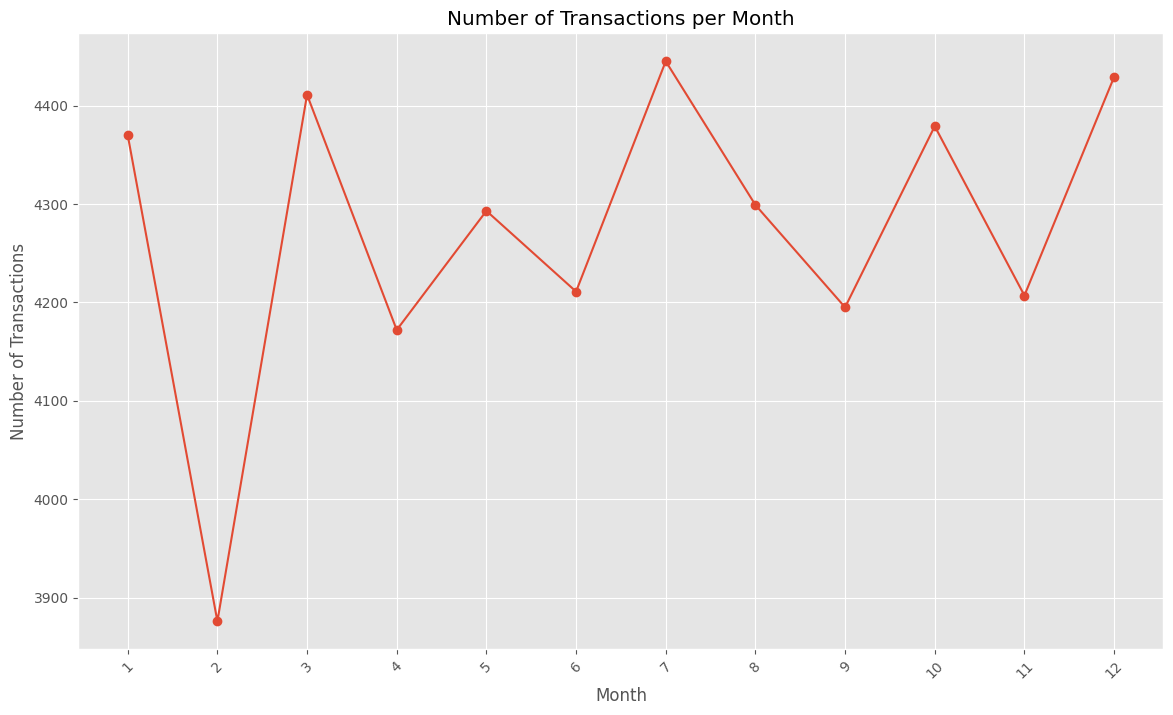

In [69]:
# Count the number of transactions per month
transactions_per_month = df_cleaned.groupby('month').size().reset_index(name='transactions')

# Plot number of transactions per month
plt.figure(figsize=(14, 8))
plt.plot(transactions_per_month['month'].astype(str), transactions_per_month['transactions'], marker='o')
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Average order value per Month

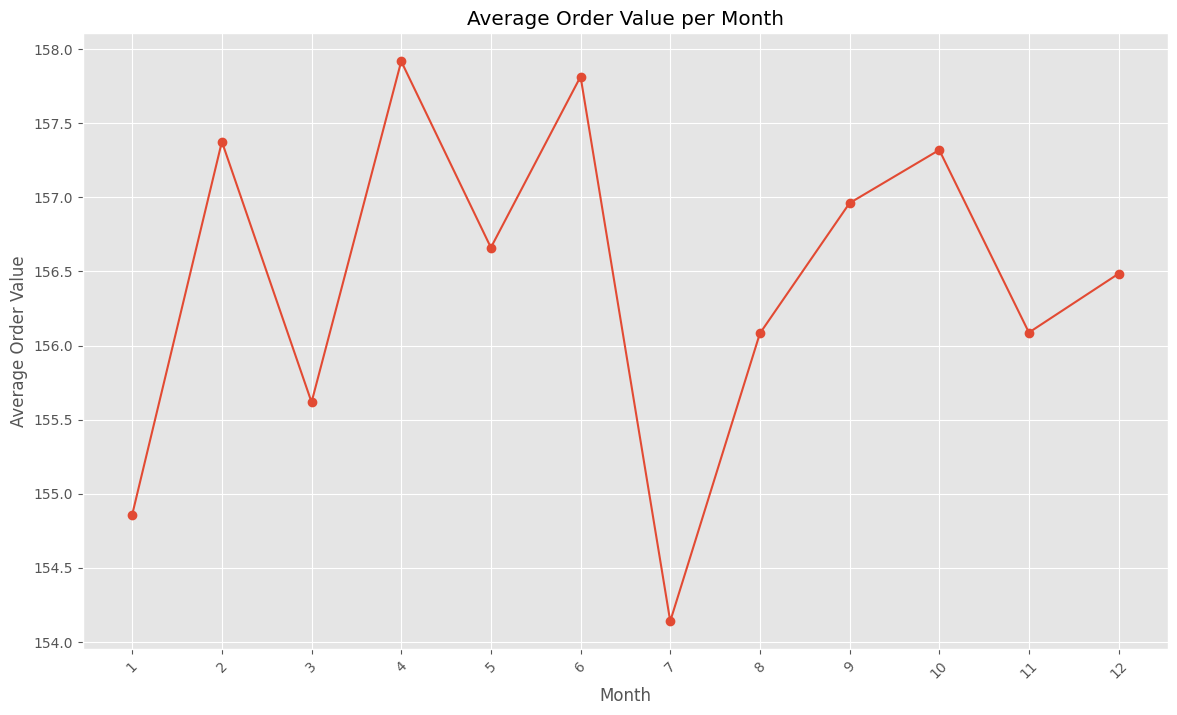

In [70]:
# Calculate average order value per month
avg_order_value_per_month = df_cleaned.groupby('month')['Sales'].mean().reset_index(name='avg_order_value')

# Plot average order value per month
plt.figure(figsize=(14, 8))
plt.plot(avg_order_value_per_month['month'].astype(str), avg_order_value_per_month['avg_order_value'], marker='o')
plt.title('Average Order Value per Month')
plt.xlabel('Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Sales Regional Analysis

Sales per Region

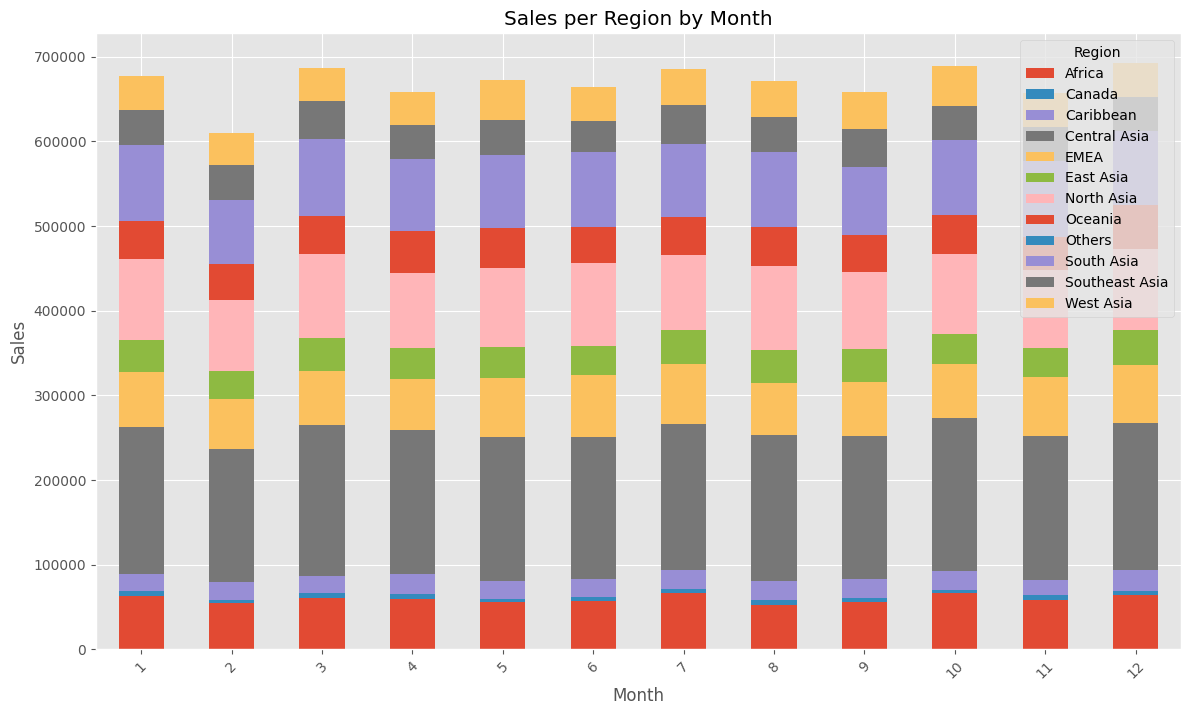

In [34]:
# Group by Region and Month, and sum the sales
region_month_sales = df_cleaned.groupby(['Region', 'month'])['Sales'].sum().reset_index()

# Pivot the table to have Regions as rows and Months as columns
pivot_table = region_month_sales.pivot(index='month', columns='Region', values='Sales')

# Plot sales per region by months
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Sales per Region by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.show()

Top 10 and Lowest 10 

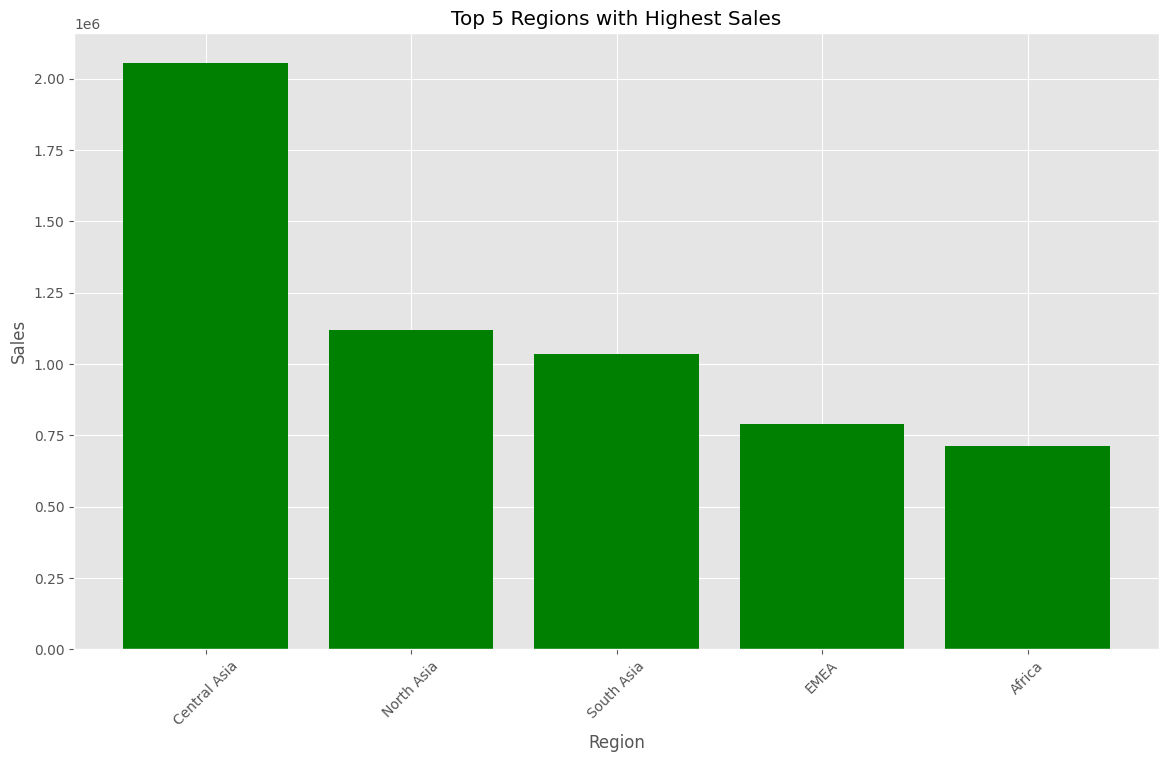

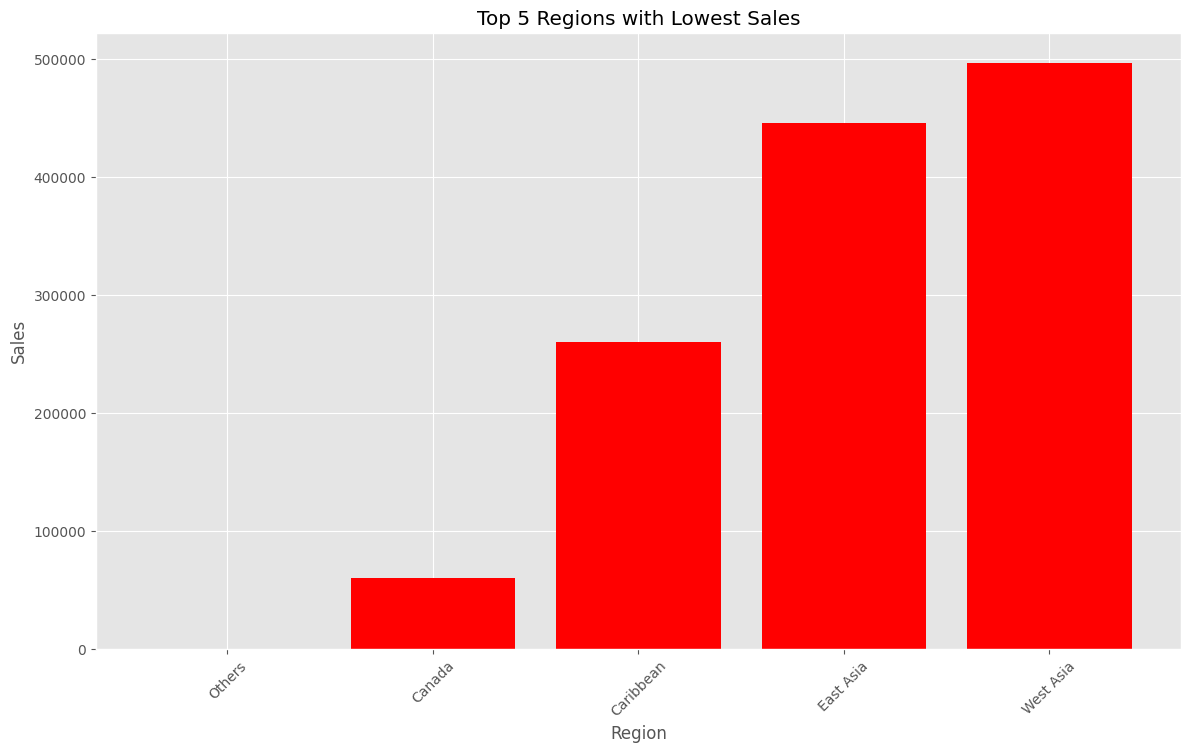

In [35]:
# Group by region and sum the sales
region_sales = df_cleaned.groupby('Region')['Sales'].sum().reset_index()

# Sort regions by sales in descending order and select top 5 and bottom 5
top_5_regions = region_sales.sort_values(by='Sales', ascending=False).head(5)
bottom_5_regions = region_sales.sort_values(by='Sales', ascending=True).head(5)

# Plot top 5 regions with highest sales
plt.figure(figsize=(14, 8))
plt.bar(top_5_regions['Region'], top_5_regions['Sales'], color='green')
plt.title('Top 5 Regions with Highest Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot top 5 regions with lowest sales
plt.figure(figsize=(14, 8))
plt.bar(bottom_5_regions['Region'], bottom_5_regions['Sales'], color='red')
plt.title('Top 5 Regions with Lowest Sales')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Segment Analysis

Sales per Segment

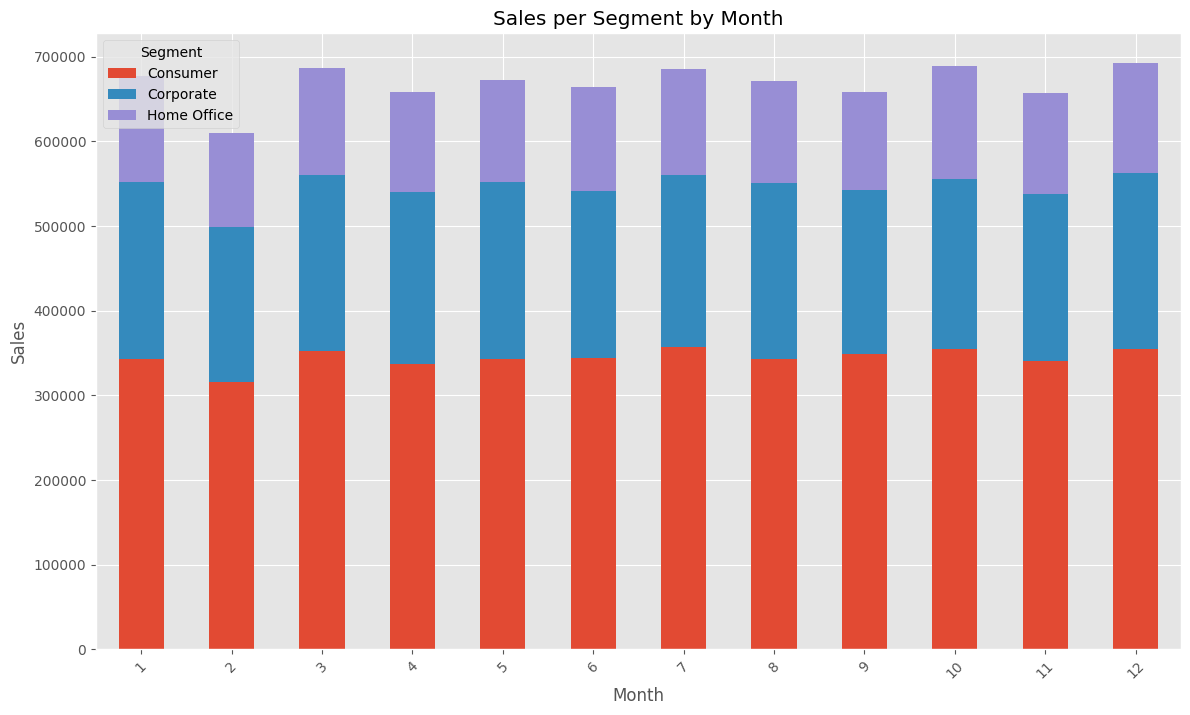

In [36]:
# Group by segment and month, and sum the sales
segment_month_sales = df_cleaned.groupby(['Segment', 'month'])['Sales'].sum().reset_index()

# Pivot the data for easier plotting
pivot_segment_month_sales = segment_month_sales.pivot(index='month', columns='Segment', values='Sales').fillna(0)

# Plot sales per segment by month using a bar chart
pivot_segment_month_sales.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Sales per Segment by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.grid(True)
plt.show()

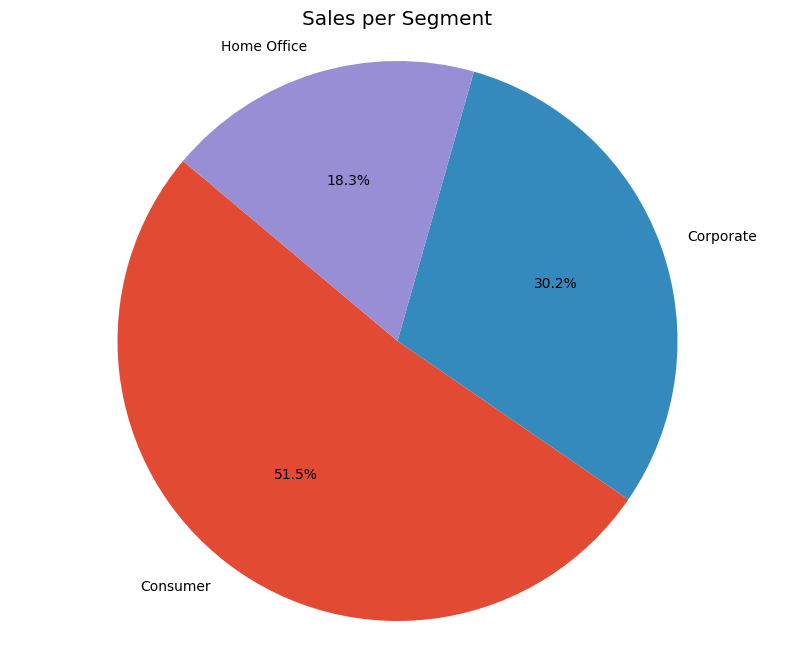

In [37]:
# Group by segment and sum the sales
segment_sales = df_cleaned.groupby('Segment')['Sales'].sum().reset_index()

# Create a pie chart for sales per segment
plt.figure(figsize=(10, 8))
plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Sales per Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Number of Transaction per Segment

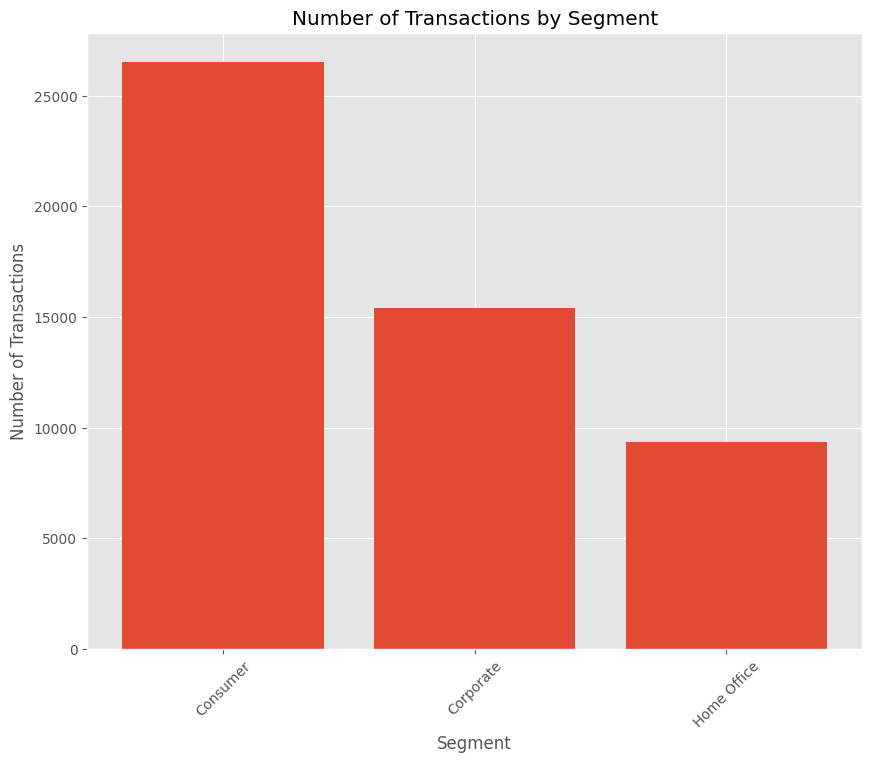

In [38]:
# Count the number of transactions by segment
transactions_by_segment = df_cleaned['Segment'].value_counts().reset_index()
transactions_by_segment.columns = ['Segment', 'transactions']

# Plot the number of transactions by segment
plt.figure(figsize=(10, 8))
plt.bar(transactions_by_segment['Segment'], transactions_by_segment['transactions'])
plt.title('Number of Transactions by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

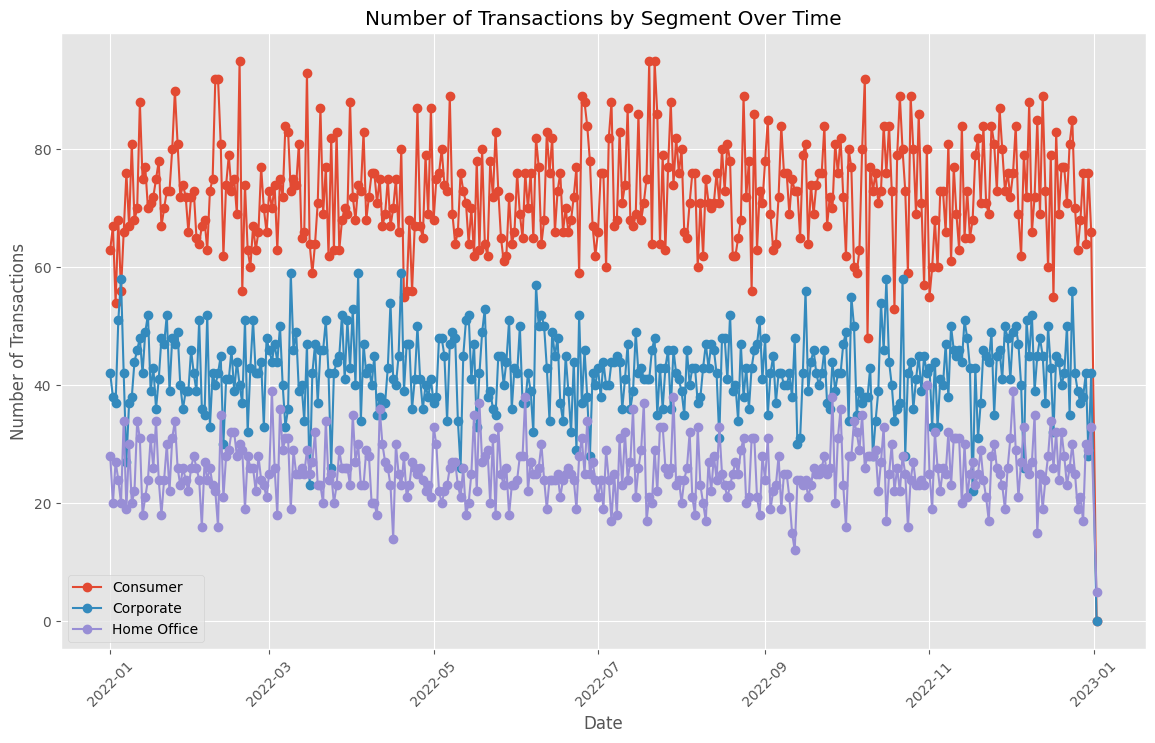

In [39]:
# Group by segment and date, and count the number of transactions
transactions_by_segment = df_cleaned.groupby(['Order Date', 'Segment']).size().reset_index(name='transactions')

# Pivot the data to have dates as rows and segments as columns
pivot_df = transactions_by_segment.pivot(index='Order Date', columns='Segment', values='transactions').fillna(0)

# Plot the number of transactions by segment over time
plt.figure(figsize=(14, 8))
for segment in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[segment], marker='o', label=segment)
plt.title('Number of Transactions by Segment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

### Margin Analysis


In [72]:
#Calculating Margin
# Calculate COGS (Cost of Goods Sold)
df['COGS'] = df['Sales'] - df['Profit']

# Calculate GPM
df['Margin'] = ((df['Sales'] - df['COGS']) / df['Sales']) * 100

# Display first few rows to check the calculations
print(df[['Sales', 'Profit', 'COGS', 'Margin']].head())

   Sales  Profit  COGS     Margin
0    140    48.8  91.2  34.857143
1     72    14.4  57.6  20.000000
2    117    25.3  91.7  21.623932
3    140    48.8  91.2  34.857143
4    118    30.9  87.1  26.186441


C:\Users\user\AppData\Local\Temp\ipykernel_12604\3738170129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COGS'] = df['Sales'] - df['Profit']
C:\Users\user\AppData\Local\Temp\ipykernel_12604\3738170129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Margin'] = ((df['Sales'] - df['COGS']) / df['Sales']) * 100


Margin per Month

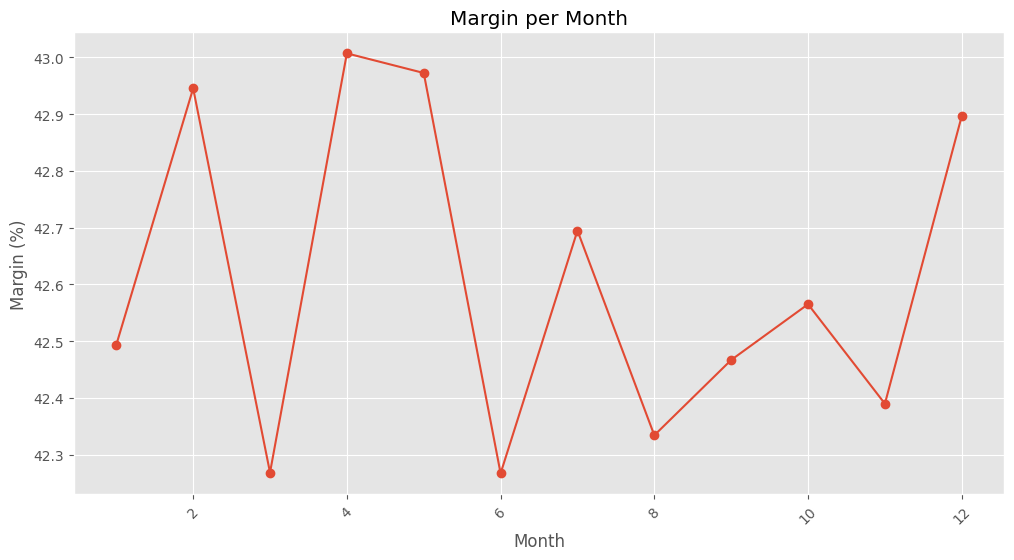

In [74]:

# Grouping
monthly_Margin = df.groupby('month')['Margin'].mean().reset_index()


# Plot Margin per month
plt.figure(figsize=(12, 6))
plt.plot(monthly_Margin['month'], monthly_Margin['Margin'], marker='o', linestyle='-')
plt.title('Margin per Month')
plt.xlabel('Month')
plt.ylabel('Margin (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Margin per Month by Region

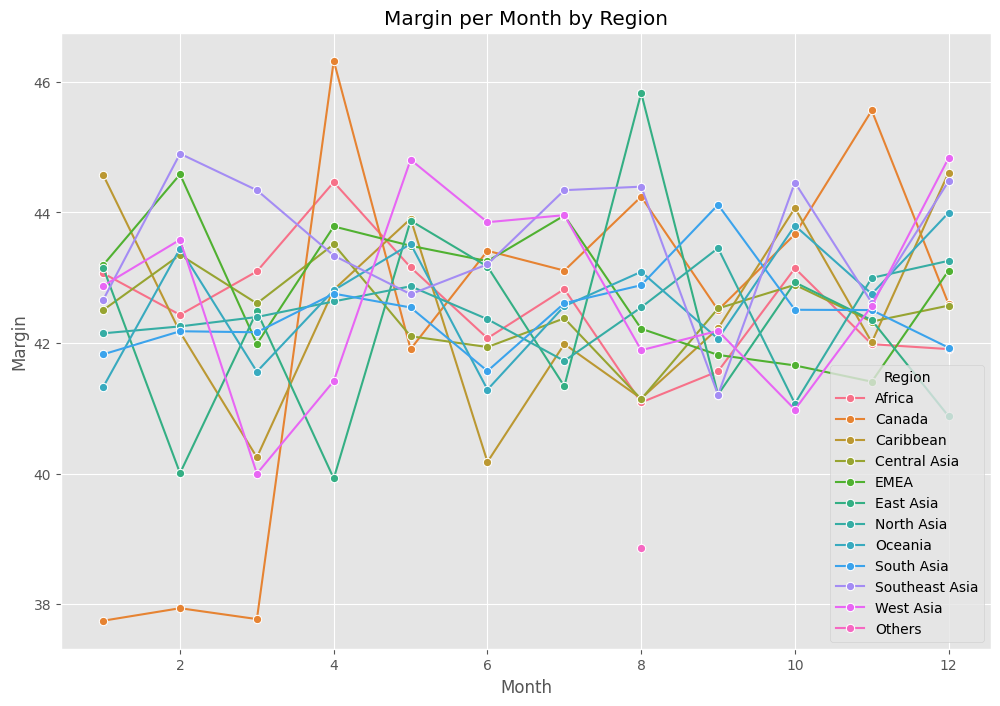

In [75]:
# Calculate margin per month by Region
margin_per_month_region = df.groupby(['month', 'Region'])['Margin'].mean().reset_index()

# Plot margin per year by Region
plt.figure(figsize=(12, 8))
sns.lineplot(data=margin_per_month_region, x='month', y='Margin', hue='Region', marker='o')
plt.title('Margin per Month by Region')
plt.xlabel('Month')
plt.ylabel('Margin')
plt.legend(title='Region')
plt.show()

Margin per Month by Segment

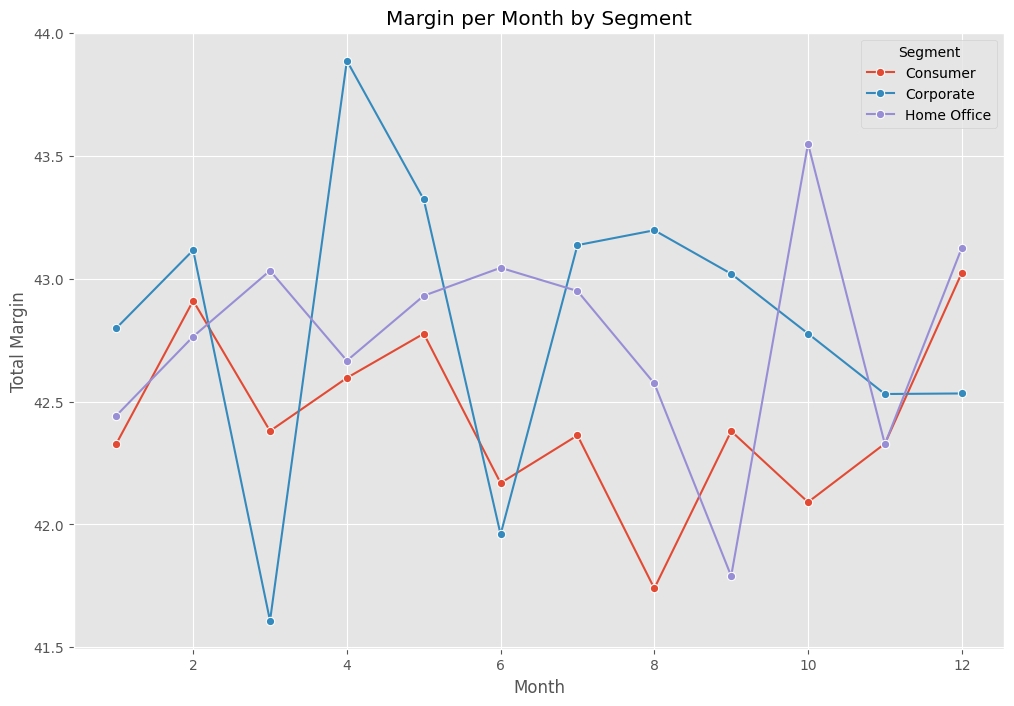

In [76]:
# Calculate margin per year by Segment
margin_per_year_segment = df.groupby(['month', 'Segment'])['Margin'].mean().reset_index()

# Plot margin per year by Segment
plt.figure(figsize=(12, 8))
sns.lineplot(data=margin_per_year_segment, x='month', y='Margin', hue='Segment', marker='o')
plt.title('Margin per Month by Segment')
plt.xlabel('Month')
plt.ylabel('Total Margin')
plt.legend(title='Segment')
plt.show()

### Delivery Lead Time

Sales per Shipment Mode

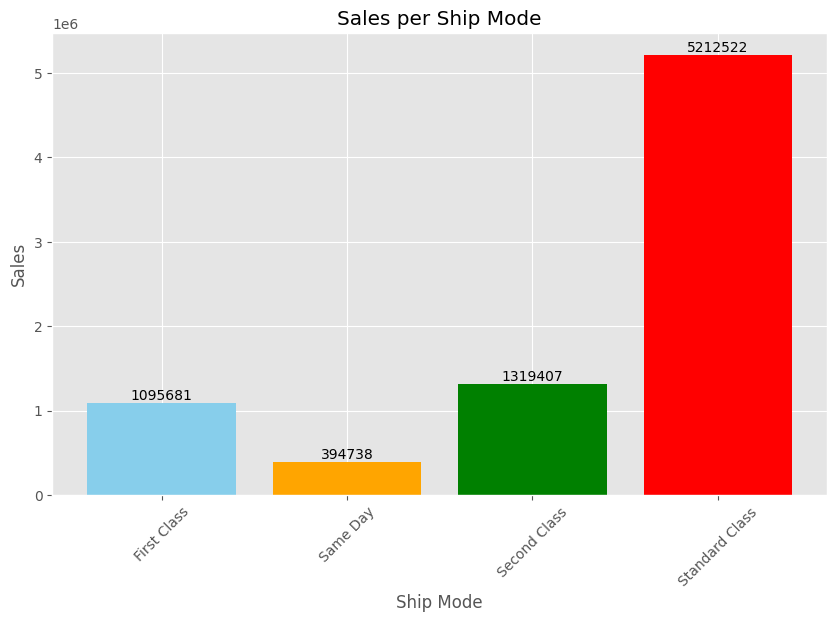

In [45]:
# Group by Ship Mode and sum the sales
sales_per_ship_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()


# Define colors for each ship mode
colors = ['skyblue', 'orange', 'green', 'red']  # Adjust the list to match the number of ship modes

# Plot sales per ship mode with different colors
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_per_ship_mode['Ship Mode'], sales_per_ship_mode['Sales'], color=colors)
plt.title('Sales per Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Add value labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')



Margin per Shipment Mode

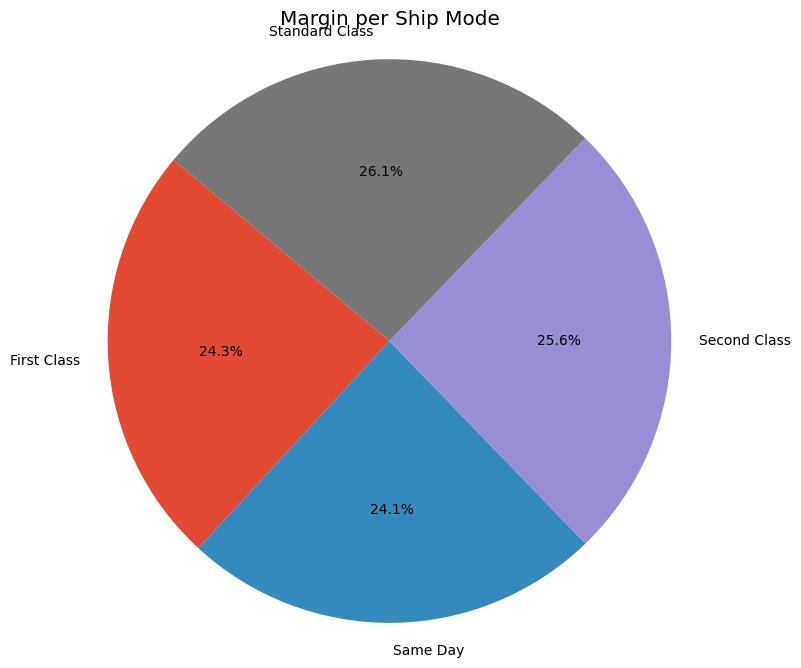

In [60]:
# Group by Ship Mode and calculate mean margin
margin_per_ship_mode = df.groupby('Ship Mode')['Margin'].mean().reset_index()

# Plot pie chart for margin per ship mode
plt.figure(figsize=(8, 8))
plt.pie(margin_per_ship_mode['Margin'], labels=margin_per_ship_mode['Ship Mode'], autopct='%1.1f%%', startangle=140)
plt.title('Margin per Ship Mode')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Average Lead Time and Number of Transactions per Month

C:\Users\user\AppData\Local\Temp\ipykernel_12604\1780482331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lead Time'] = (df['Ship Date'] - df['Order Date']).dt.days


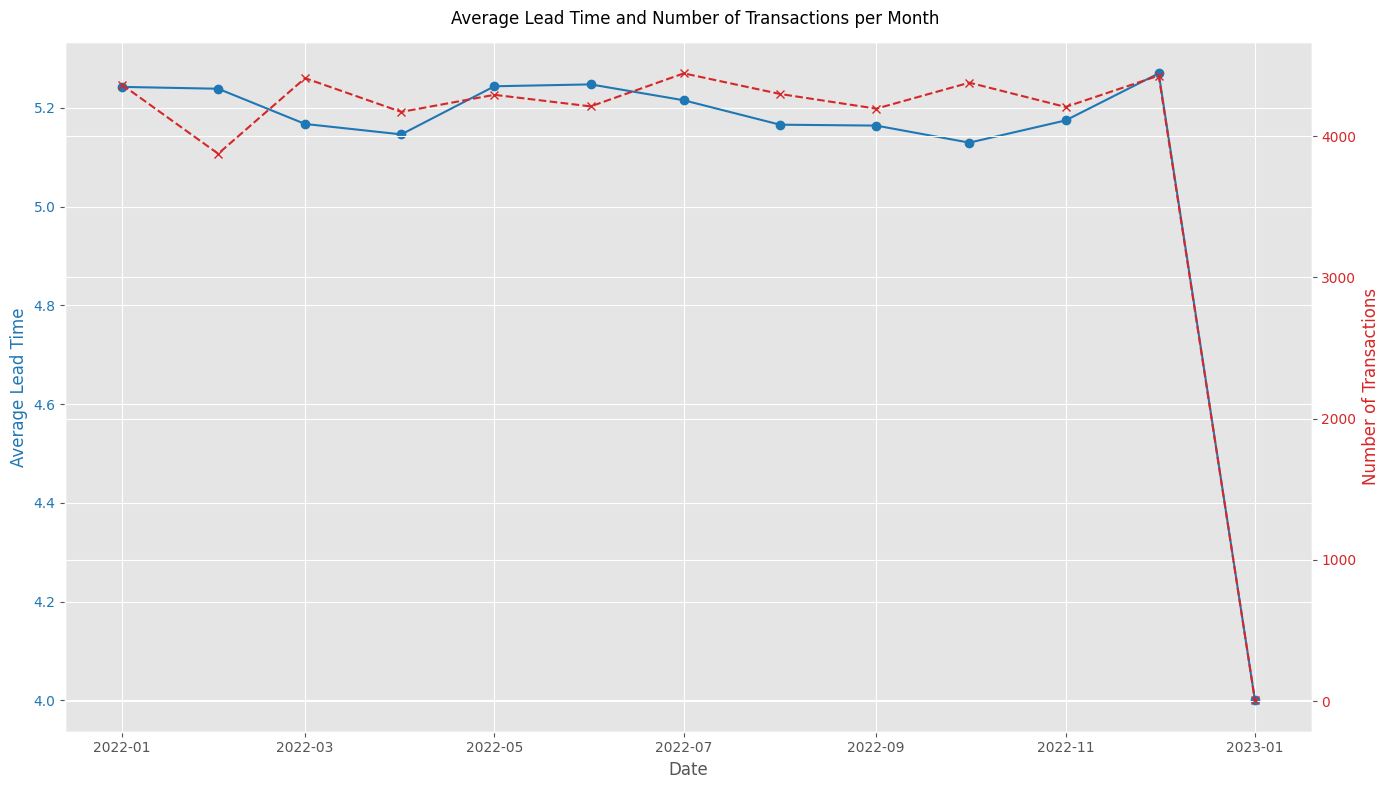

In [61]:
# Calculate Lead Time
df['Lead Time'] = (df['Ship Date'] - df['Order Date']).dt.days
# Group by year-month and calculate average lead time and number of transactions
avg_lead_time = df.groupby('year_month')['Lead Time'].mean().reset_index(name='avg_lead_time')
num_transactions = df.groupby('year_month').size().reset_index(name='num_transactions')

# Merge the two dataframes on year-month
combined = pd.merge(avg_lead_time, num_transactions, on='year_month')

# Plot average lead time and number of transactions per month
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot average lead time
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Lead Time', color='tab:blue')
ax1.plot(combined['year_month'].dt.to_timestamp(), combined['avg_lead_time'], color='tab:blue', marker='o', label='Average Lead Time')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for number of transactions
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Transactions', color='tab:red')
ax2.plot(combined['year_month'].dt.to_timestamp(), combined['num_transactions'], color='tab:red', marker='x', linestyle='--', label='Number of Transactions')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and show plot
fig.suptitle('Average Lead Time and Number of Transactions per Month')
fig.tight_layout()
plt.show()

### Product Profitability

Sales per Product Category by Month

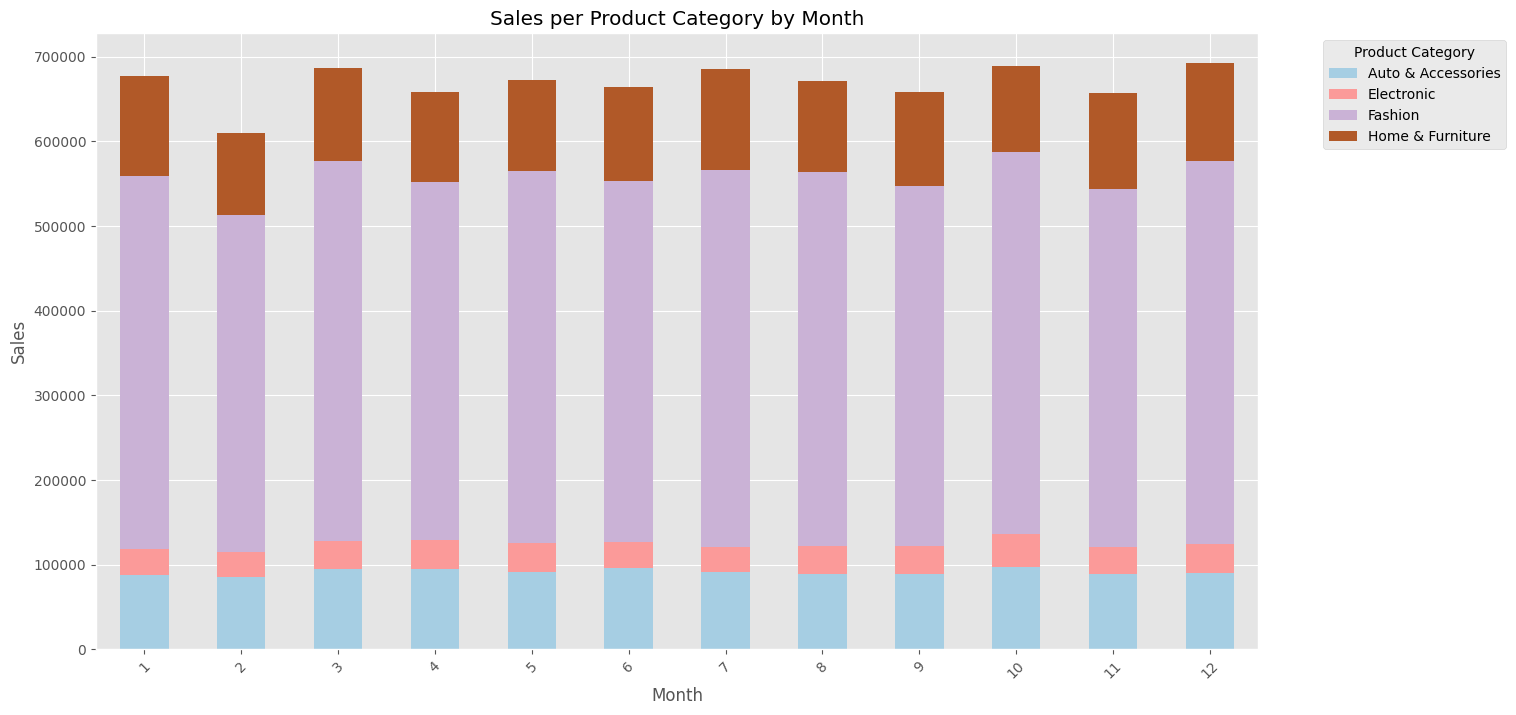

In [64]:
# Group by Product Category and month, then sum the sales
sales_per_category_month = df.groupby(['Product Category', 'month'])['Sales'].sum().reset_index()

# Pivot the data to have months as columns and product categories as rows
pivot_table = sales_per_category_month.pivot(index='Product Category', columns='month', values='Sales').fillna(0)

# Plot sales per product category by month
pivot_table.T.plot(kind='bar', figsize=(15, 8), stacked=True, colormap='Paired')

plt.title('Sales per Product Category by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Margin per Month by Product Category

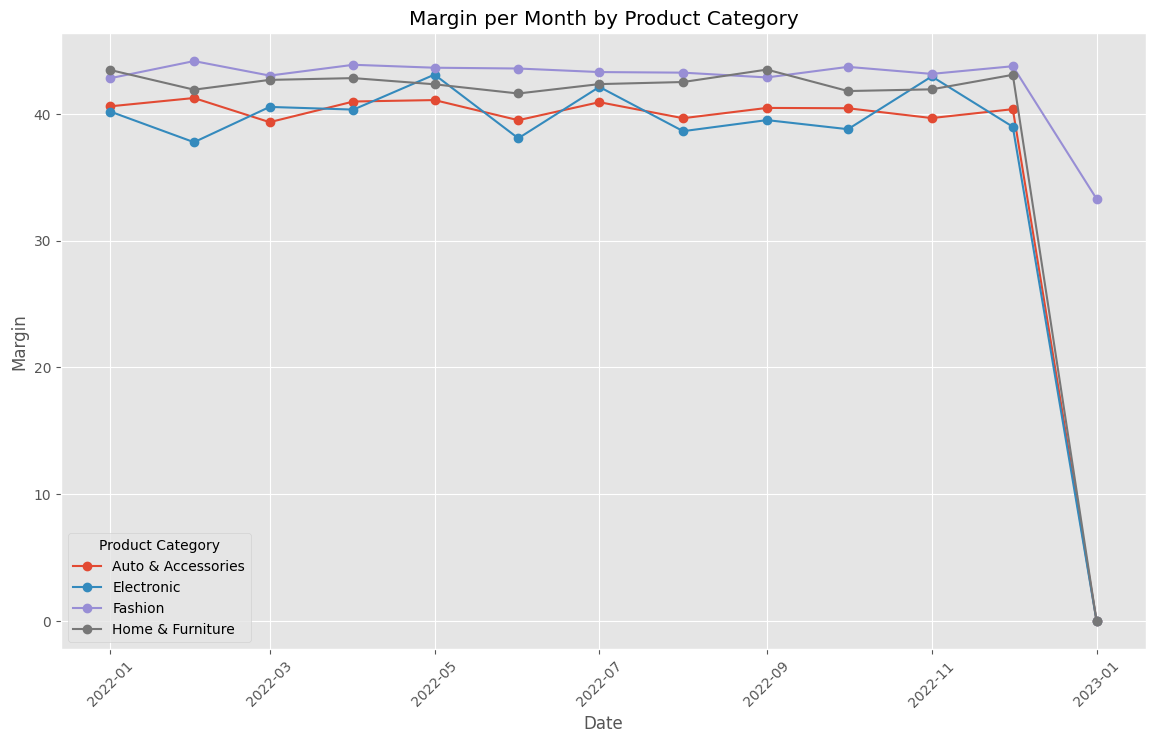

In [81]:
# Group by year-month and product category to calculate mean margin
margin_per_month_category = df.groupby(['year_month', 'Product Category'])['Margin'].mean().reset_index()

# Pivot the data to have year-month as rows and product categories as columns
pivot_margin = margin_per_month_category.pivot(index='year_month', columns='Product Category', values='Margin').fillna(0)

# Plot margin per month by product category
plt.figure(figsize=(14, 8))
for category in pivot_margin.columns:
    plt.plot(pivot_margin.index.to_timestamp(), pivot_margin[category], marker='o', label=category)
plt.title('Margin per Month by Product Category')
plt.xlabel('Date')
plt.ylabel('Margin')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.grid(True)
plt.show()